## Install TensorFlow

In [2]:
!pip install tensorflow

# Setup

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Download Dataset

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 1s 0us/step


# Create Dataset

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
sample_training_images, _ = next(train_data_gen)

In [11]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

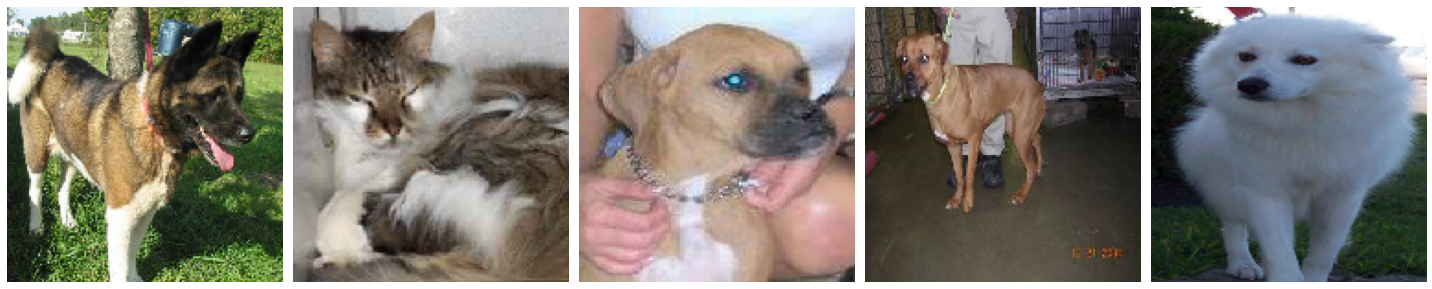

In [12]:
plotImages(sample_training_images[:5])

In [13]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


In [14]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


In [15]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

# Training

In [17]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
15/15 [==============================] - 29s 1s/step - loss: 0.9955 - accuracy: 0.5198 - val_loss: 0.6954 - val_accuracy: 0.4922
Epoch 2/30
15/15 [==============================] - 16s 1s/step - loss: 0.6936 - accuracy: 0.5021 - val_loss: 0.6926 - val_accuracy: 0.5011
Epoch 3/30
15/15 [==============================] - 16s 1s/step - loss: 0.6929 - accuracy: 0.5048 - val_loss: 0.6926 - val_accuracy: 0.6105
Epoch 4/30
15/15 [==============================] - 16s 1s/step - loss: 0.6918 - accuracy: 0.5347 - val_loss: 0.6902 - val_accuracy: 0.5647
Epoch 5/30
15/15 [==============================] - 16s 1s/step - loss: 0.6902 - accuracy: 0.5281 - val_loss: 0.6878 - val_accuracy: 0.5145
Epoch 6/30
15/15 [==============================] - 16s 1s/step - loss: 0.6865 - accuracy: 0.5315 - val_loss: 0.6863 - val_accuracy: 0.5670
Epoch 7/30
15/15 [==============================] - 16s 1s/step - loss: 0.6747 - accuracy: 0.5710 - val_loss: 0.6717 - val_accuracy: 0.6004
Epoch 8/30
15/15 [==

# Save Model

In [18]:
model_new.save('dog_vs_cat.h5')

In [19]:
def preprocess_image(image):
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

# Predict

In [31]:
validation_cat_sample = os.path.join(validation_cats_dir, 'cat.2000.jpg')
validation_dog_sample = os.path.join(validation_dogs_dir, 'dog.2000.jpg')
samples = [validation_cat_sample, validation_dog_sample]

for sample in samples:
  img = load_and_preprocess_image(sample)

  img = (np.expand_dims(img,0))

  prediction = model_new.predict(img)
  print(prediction[0])
  print(np.argmax(prediction[0]))


[0.36033967]
0
[0.99901605]
0


# Load Model


In [32]:
load_model = tf.keras.models.load_model('dog_vs_cat.h5')

validation_cat_sample = os.path.join(validation_cats_dir, 'cat.2000.jpg')
validation_dog_sample = os.path.join(validation_dogs_dir, 'dog.2000.jpg')
samples = [validation_cat_sample, validation_dog_sample]

for sample in samples:
  img = load_and_preprocess_image(sample)

  img = (np.expand_dims(img,0))

  prediction = model_new.predict(img)
  print(prediction[0])
  print(np.argmax(prediction[0]))


[0.36033967]
0
[0.99901605]
0
